In [1]:
from pycocotools.coco import COCO
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pycocotools.mask as mask_util
from random import randint

coco_folder = '/media/svakhreev/022cfb2b-3c52-4dfe-a5fb-c5fe826db5e3/coco_2014/'
dp_coco = COCO(os.path.join(coco_folder, 'annotations/densepose_coco_2014_minival.json'))

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


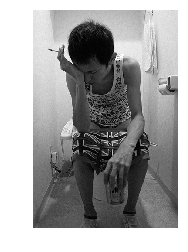

In [25]:
# Get img id's for the minival dataset.
im_ids = dp_coco.getImgIds()
# Select a random image id.
Selected_im = im_ids[58] # Choose im no 57 to replicate 
# Load the image
im = dp_coco.loadImgs(Selected_im)[0]  
# Load Anns for the selected image.
ann_ids = dp_coco.getAnnIds( imgIds=im['id'] )
anns = dp_coco.loadAnns(ann_ids)
# Now read and b
im_name = os.path.join(coco_folder + 'images/val2014', im['file_name'])
I=cv2.imread(im_name)
plt.imshow(I[:,:,::-1]); plt.axis('off'); plt.show()

In [26]:
def GetDensePoseMask(Polys):
    MaskGen = np.zeros([256,256])
    for i in range(1,15):
        if(Polys[i-1]):
            current_mask = mask_util.decode(Polys[i-1])
            MaskGen[current_mask>0] = i
    return MaskGen

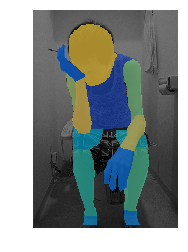

In [27]:
I_vis=I.copy()/2 # Dim the image.

for ann in anns:  
    bbr =  np.array(ann['bbox']).astype(int) # the box.
    if( 'dp_masks' in ann.keys()): # If we have densepose annotation for this ann, 
        Mask = GetDensePoseMask(ann['dp_masks'])
        ################
        x1,y1,x2,y2 = bbr[0],bbr[1],bbr[0]+bbr[2],bbr[1]+bbr[3]
        x2 = min( [ x2,I.shape[1] ] );  y2 = min( [ y2,I.shape[0] ] )
        ################ 
        MaskIm = cv2.resize( Mask, (int(x2-x1),int(y2-y1)) ,interpolation=cv2.INTER_NEAREST)
        MaskBool = np.tile((MaskIm==0)[:,:,np.newaxis],[1,1,3])
        #  Replace the visualized mask image with I_vis.
        Mask_vis = cv2.applyColorMap( (MaskIm*15).astype(np.uint8) , cv2.COLORMAP_PARULA)[:,:,:]
        Mask_vis[MaskBool]=I_vis[y1:y2,x1:x2,:][MaskBool]
        I_vis[y1:y2,x1:x2,:] = I_vis[y1:y2,x1:x2,:]*0.3 + Mask_vis*0.7

plt.imshow(I_vis[:,:,::-1].astype(np.uint8)); plt.axis('off'); plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


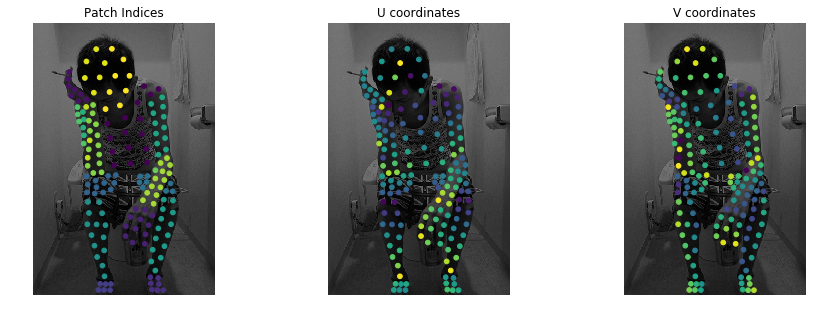

In [28]:
# Show images for each subplot.
fig = plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.imshow((I[:,:,::-1]/2).astype(np.uint8));plt.axis('off');plt.title('Patch Indices')
plt.subplot(1,3,2)
plt.imshow((I[:,:,::-1]/2).astype(np.uint8));plt.axis('off');plt.title('U coordinates')
plt.subplot(1,3,3)
plt.imshow((I[:,:,::-1]/2).astype(np.uint8));plt.axis('off');plt.title('V coordinates')

## For each ann, scatter plot the collected points.
for ann in anns:
    bbr =  np.round(ann['bbox']) 
    if( 'dp_masks' in ann.keys()):
        Point_x = np.array(ann['dp_x'])/ 255. * bbr[2] # Strech the points to current box.
        Point_y = np.array(ann['dp_y'])/ 255. * bbr[3] # Strech the points to current box.
        #
        Point_I = np.array(ann['dp_I'])
        Point_U = np.array(ann['dp_U'])
        Point_V = np.array(ann['dp_V'])
        #
        x1,y1,x2,y2 = bbr[0],bbr[1],bbr[0]+bbr[2],bbr[1]+bbr[3]
        x2 = min( [ x2,I.shape[1] ] ); y2 = min( [ y2,I.shape[0] ] )
        ###############
        Point_x = Point_x + x1 ; Point_y = Point_y + y1
        plt.subplot(1,3,1)
        plt.scatter(Point_x,Point_y,22,Point_I)
        plt.subplot(1,3,2)
        plt.scatter(Point_x,Point_y,22,Point_U)
        plt.subplot(1,3,3)
        plt.scatter(Point_x,Point_y,22,Point_V)
        
plt.show()

In [29]:
ann.keys()

dict_keys(['segmentation', 'num_keypoints', 'dp_masks', 'area', 'dp_I', 'iscrowd', 'keypoints', 'dp_x', 'dp_U', 'image_id', 'dp_V', 'bbox', 'category_id', 'dp_y', 'id'])

In [34]:
ann['dp_masks']

[{'counts': ']Zb01o7013L4M2M4M1N4L012M3N2M4L3M4L004L3^IhNV6a10000000000000000O10000000000O10000O10000000000O10000000O12M10000O10000O100O1O10000O010O100O1O100N2O1N2O1O1N2N110O1O1M3N2N2N200O1O1N2O1O1000000001O00000000000000001dMnJh1R5WNVKa1k4^NZK^1f4bNZK^1g4`N]K]1c4aNbK\\1^4cNgKY1Y4gNkKU1U4kNnKR1R4mNSLo0m3QOSLo0m3QOWLk0i3UOZLh0g3VO]Lg0c3YO_Le0a3[OaLb0`3]ObLa0_3_OcL>^3BbL>^3BcL<_3BcL<^3DdL9]3GeL2a3MY2O100000af=',
  'size': [256, 256]},
 {'counts': 'T1<d7002M2N2O1O2N3M003M2M1N2O101O0001O001VOUI>j6]O]Ia0R70O0001O100O10O010O000000010O000001O01O01000O00011N0010N101O00001O001N2O000O101O001O001N10001O00001O0Nom]1',
  'size': [256, 256]},
 {'counts': 'men0;d74L3N0O2N001N2O1N200N2N2O10LRIWOl6f0VI_Og6>ZIEe6;[IEe6:YIJe65[IMe60[I4c6L\\I6d6H\\I;b6b00000O001O10O01N2000C<00O100000ZIWOW6i0iIWOV6[1O1O2N1O1OO10001O000O2O000000000O100O2O00000O100E;N3M2N2N200O1N2O1O2L3N200M3M3L4LQS=',
  'size': [256, 256]},
 {'counts': ']_\\1;e71O2N2N1O2N0000000001O00000000000000000000001O0000000000000000008H1O1O002N1O1O1O1